# Importing the libraries:

In [28]:
import os
import shutil
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, 
    classification_report, confusion_matrix, roc_auc_score, 
    roc_curve, precision_recall_curve, average_precision_score
)
from tensorflow.keras import layers
import random
from PIL import Image
import pandas as pd
%matplotlib inline

# Data Visualization:

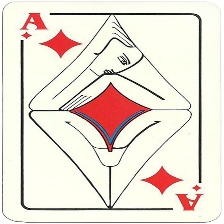

In [30]:
import os
import random
from IPython.display import Image, display

# Specify the path to your image folder
folder_path = "D:/Cardmaster Project/dataset/train/ace of diamonds"  # Replace with your actual path

# List all image files in the folder
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png', '.jpeg'))]

# Select a random image
selected_image = random.choice(image_files)

# Display the randomly selected image
image_path = os.path.join(folder_path, selected_image)
display(Image(filename=image_path))


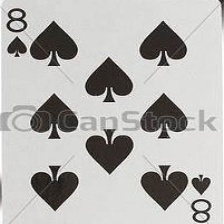

In [31]:
import os
import random
from IPython.display import Image, display

# ✅ Set the folder path to your image class
folder_path = "D:/Cardmaster Project/dataset/train/eight of spades"  # Replace with your actual directory

# 🔍 Get a list of image files (jpg, jpeg, png)
image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

# 🎯 Randomly pick one file
selected_image = random.choice(image_files)

# 📸 Display the image
image_path = os.path.join(folder_path, selected_image)
display(Image(filename=image_path))

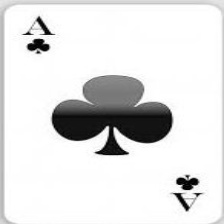

In [32]:
import os
import random
from IPython.display import Image, display

# Specify the path to your image folder
folder_path = "D:/Cardmaster Project/dataset/train/ace of clubs"  # Update if your folder path differs

# Get a list of image files in the folder
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png', '.jpeg'))]

# Randomly select an image
selected_image = random.choice(image_files)

# Display the randomly selected image
image_path = os.path.join(folder_path, selected_image)
display(Image(filename=image_path))

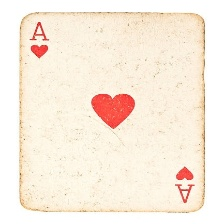

In [33]:
import os
import random
from IPython.display import Image, display

# Specify the path to your image folder
folder_path = "D:/Cardmaster Project/dataset/train/ace of hearts"  # Update with your actual folder path

# List all image files in the folder
image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

# Randomly select an image
selected_image = random.choice(image_files)

# Display the randomly selected image
image_path = os.path.join(folder_path, selected_image)
display(Image(filename=image_path))

# Split Data:

In [56]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define directory paths
trainpath = 'D:/Cardmaster Project/dataset/test'
testpath = 'D:/Cardmaster Project/dataset/test'
valpath = 'D:/Cardmaster Project/dataset/valid'

# Create data generators with normalization and augmentation
train_datagen = ImageDataGenerator(
    rescale=1/255,
    zoom_range=0.2,
    shear_range=0.2
)

test_datagen = ImageDataGenerator(rescale=1/255)
val_datagen = ImageDataGenerator(rescale=1/255)

# # Load images from directories
# train = train_datagen.flow_from_directory(
#     trainpath,
#     target_size=(224, 224),
#     batch_size=16
# )
train = train_datagen.flow_from_directory(
    trainpath,
    target_size=(299, 299),  # 👈 Correct this
    batch_size=16,
    class_mode='categorical'  # Ensure categorical for 53-class softmax
)

val = val_datagen.flow_from_directory(
    valpath,
    target_size=(299, 299),  # 👈 Correct this
    batch_size=16,
    class_mode='categorical'
)
# 🔄 Create a mapping from label index to class name
label_to_class_name = {v: k for k, v in train.class_indices.items()}

test = test_datagen.flow_from_directory(
    testpath,
    target_size=(224, 224),
    batch_size=16
)

# val = val_datagen.flow_from_directory(
#     valpath,
#     target_size=(224, 224),
#     batch_size=16
# )

Found 265 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
Found 265 images belonging to 53 classes.


# Model Building:


### 1. VGG16 Transfer Learning Mode

In [70]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# 🎯 Set the number of classes
num_classes = 53

# 📦 Load VGG16 base model without top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# ❄️ Freeze all base model layers
for layer in base_model.layers:
    layer.trainable = False

# 🔧 Add classification head
x = Flatten()(base_model.output)
x = Dropout(0.5)(x)
output = Dense(num_classes, activation='softmax')(x)

# 🧠 Assemble final model
vgg16_model = Model(inputs=base_model.input, outputs=output)

# ⚙️ Compile model
vgg16_model.compile(optimizer=Adam(learning_rate=0.001),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

In [71]:
train1 = train_datagen.flow_from_directory(
    trainpath,
    target_size=(224, 224),  # ✅ VGG16 expects 224×224
    batch_size=16,
    class_mode='categorical'
)

val1 = val_datagen.flow_from_directory(
    valpath,
    target_size=(224, 224),  # ✅ Match VGG16 shape
    batch_size=16,
    class_mode='categorical'
)

Found 265 images belonging to 53 classes.
Found 265 images belonging to 53 classes.


In [47]:
# ✅ Evaluate VGG16 model
vgg_loss, vgg_accuracy = vgg16_model.evaluate(val, steps=len(val))
print(f"VGG16 Validation Accuracy: {vgg_accuracy * 100:.2f}%")

17/17 ━━━━━━━━━━━━━━━━━━━━ 15s 875ms/step - accuracy: 0.0145 - loss: 4.1507
VGG16 Validation Accuracy: 0.75%


In [73]:

# 🚀 Train the model with history tracking
history_vgg = vgg16_model.fit(
    train1,
    epochs=15,
    validation_data=val1,
    steps_per_epoch=len(train1),
    validation_steps=len(val1)
)

Epoch 1/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.0938 - loss: 4.7528 - val_accuracy: 0.2226 - val_loss: 3.2877
Epoch 2/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.4501 - loss: 1.8801 - val_accuracy: 0.3208 - val_loss: 2.7060
Epoch 4/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.6747 - loss: 1.1008 - val_accuracy: 0.3736 - val_loss: 2.4641
Epoch 6/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.7931 - loss: 0.6352 - val_accuracy: 0.4491 - val_loss: 2.4648
Epoch 8/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.8551 - loss: 0.4306 - val_accuracy: 0.4151 - val_loss: 2.317

### 2. InceptionV3 Transfer Learning Mode

In [ ]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import Adam

# Define number of classes
num_classes = 53  # Set this to match your dataset

# Load InceptionV3 base model (excluding top layers)
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze pretrained layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom head
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(1024, activation='relu')(x)
output = Dense(num_classes, activation='softmax')(x)

# Create the full model
inception_model = Model(inputs=base_model.input, outputs=output)

# Compile the model
inception_model.compile(optimizer=Adam(learning_rate=0.001),
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

In [74]:
# ✅ Evaluate Inception model
inception_loss, inception_accuracy = inception_model.evaluate(val, steps=len(val))
print(f"InceptionV3 Validation Accuracy: {inception_accuracy * 100:.2f}%")

17/17 ━━━━━━━━━━━━━━━━━━━━ 9s 484ms/step - accuracy: 0.2091 - loss: 3.2221
InceptionV3 Validation Accuracy: 20.38%


In [ ]:

# Train the model and store history for visualization
history_inception = inception_model.fit(
    train,
    epochs=15,
    validation_data=val,
    steps_per_epoch=len(train),
    validation_steps=len(val)
)

Epoch 1/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.0318 - loss: 4.5054 - val_accuracy: 0.0755 - val_loss: 3.8195
Epoch 2/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/15


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


17/17 ━━━━━━━━━━━━━━━━━━━━ 16s 988ms/step - accuracy: 0.1993 - loss: 3.1701 - val_accuracy: 0.1623 - val_loss: 3.3022
Epoch 4/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 16s 989ms/step - accuracy: 0.4311 - loss: 2.3084 - val_accuracy: 0.1321 - val_loss: 3.2323
Epoch 6/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 16s 981ms/step - accuracy: 0.5499 - loss: 1.6506 - val_accuracy: 0.1245 - val_loss: 3.3035
Epoch 8/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 16s 986ms/step - accuracy: 0.5765 - loss: 1.4857 - val_accuracy: 0.2000 - val_loss: 3.1094
Epoch 10/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 11/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.7501 - loss: 1.0291 - val_accuracy: 0.2151 - val_loss: 3.0772

### 3. Xception Transfer Learning Model



In [ ]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import Adam

# 🎯 Number of classes
num_classes = 53

# 📦 Load base model (input shape must be 299x299 for Xception)
base_model = Xception(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# ❄️ Freeze pretrained layers
for layer in base_model.layers:
    layer.trainable = False

# 🧠 Add custom classifier
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(1024, activation='relu')(x)
output = Dense(num_classes, activation='softmax')(x)

# 🧩 Create model
xception_model = Model(inputs=base_model.input, outputs=output)

# ⚙️ Compile
xception_model.compile(optimizer=Adam(learning_rate=0.001),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])


In [75]:
# ✅ Evaluate Xception model
xception_loss, xception_accuracy = xception_model.evaluate(val, steps=len(val))
print(f"Xception Validation Accuracy: {xception_accuracy * 100:.2f}%")

17/17 ━━━━━━━━━━━━━━━━━━━━ 19s 984ms/step - accuracy: 0.0078 - loss: 3.9941
Xception Validation Accuracy: 0.75%


In [79]:

# 🚀 Train and store history
history_xcep = xception_model.fit(
    train,
    epochs=15,
    validation_data=val,
    steps_per_epoch=len(train),
    validation_steps=len(val)
)

Epoch 1/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.0371 - loss: 4.1846 - val_accuracy: 0.1132 - val_loss: 3.6006
Epoch 2/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.3859 - loss: 2.9811 - val_accuracy: 0.1660 - val_loss: 3.1482
Epoch 4/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.4625 - loss: 2.1235 - val_accuracy: 0.1585 - val_loss: 3.0387
Epoch 6/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.6037 - loss: 1.5193 - val_accuracy: 0.1849 - val_loss: 3.0595
Epoch 8/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.6786 - loss: 1.2065 - val_accuracy: 0.1736 - val_loss: 3.1296
Ep

# Testing Model & Data Prediction

In [45]:
from keras.preprocessing import image
import numpy as np

# ✅ Path to the image you want to test
img_path = 'D:/Cardmaster Project/dataset/train/ten of spades/001.jpg'  # Adjust as needed

# 📦 Load and preprocess the image
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Shape: (1, 224, 224, 3)
img_array = img_array / 255.0  # Normalize if not done during training

# 🔍 Predict the class
predictions = vgg16_model(img_array)
predicted_class_index = np.argmax(predictions, axis=1)[0]

# 🧾 Map index to class name (Assumes you have this dict prepared)
# Example: label_to_class_name = {0: 'ace of hearts', 1: 'ten of spades', ...}
predicted_class_name = label_to_class_name[predicted_class_index]

# 📢 Output
print(f"Predicted Class Index: {predicted_class_index}")
print(f"Predicted Class Name: {predicted_class_name}")

Predicted Class Index: 17
Predicted Class Name: jack of diamonds


# Saving the model

In [39]:
vgg16_model.save('vgg16_model.h5')